In [1]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
from pandas import DataFrame,read_csv
from matplotlib import style
%matplotlib inline

In [2]:
filepath = ("Resources/cleaned_airbnb_data.csv" )
airbnb_df=pd.read_csv(filepath,low_memory= False)
airbnb_df.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
3,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
4,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN


# The Highest Average Rating Neighbourhood group

In [3]:
df=pd.DataFrame(airbnb_df,columns=['neighbourhood group','review rate number'])
df
                                

,neighbourhood group,review rate number
0,Brooklyn,4.0
1,Manhattan,4.0
2,Brooklyn,4.0
3,Manhattan,3.0
4,Brooklyn,5.0
...,...,...
82101,Queens,1.0
82102,Manhattan,4.0
82103,Manhattan,4.0
82104,Brooklyn,1.0


In [4]:
df.groupby(["neighbourhood group"]).agg(
    {"review rate number":["sum","max","mean",lambda x:x.max()-x.min()]})

review rate number                          
                                   sum  max      mean <lambda_0>
neighbourhood group                                             
Bronx                           7594.0  5.0  3.349801        4.0
Brooklyn                      111359.0  5.0  3.270551        4.0
Manhattan                     111351.0  5.0  3.283044        4.0
Queens                         36912.0  5.0  3.338036        4.0
Staten Island                   2781.0  5.0  3.412270        4.0

In [5]:
# Arranging needed dataframe

temp=df[['neighbourhood group','review rate number']]

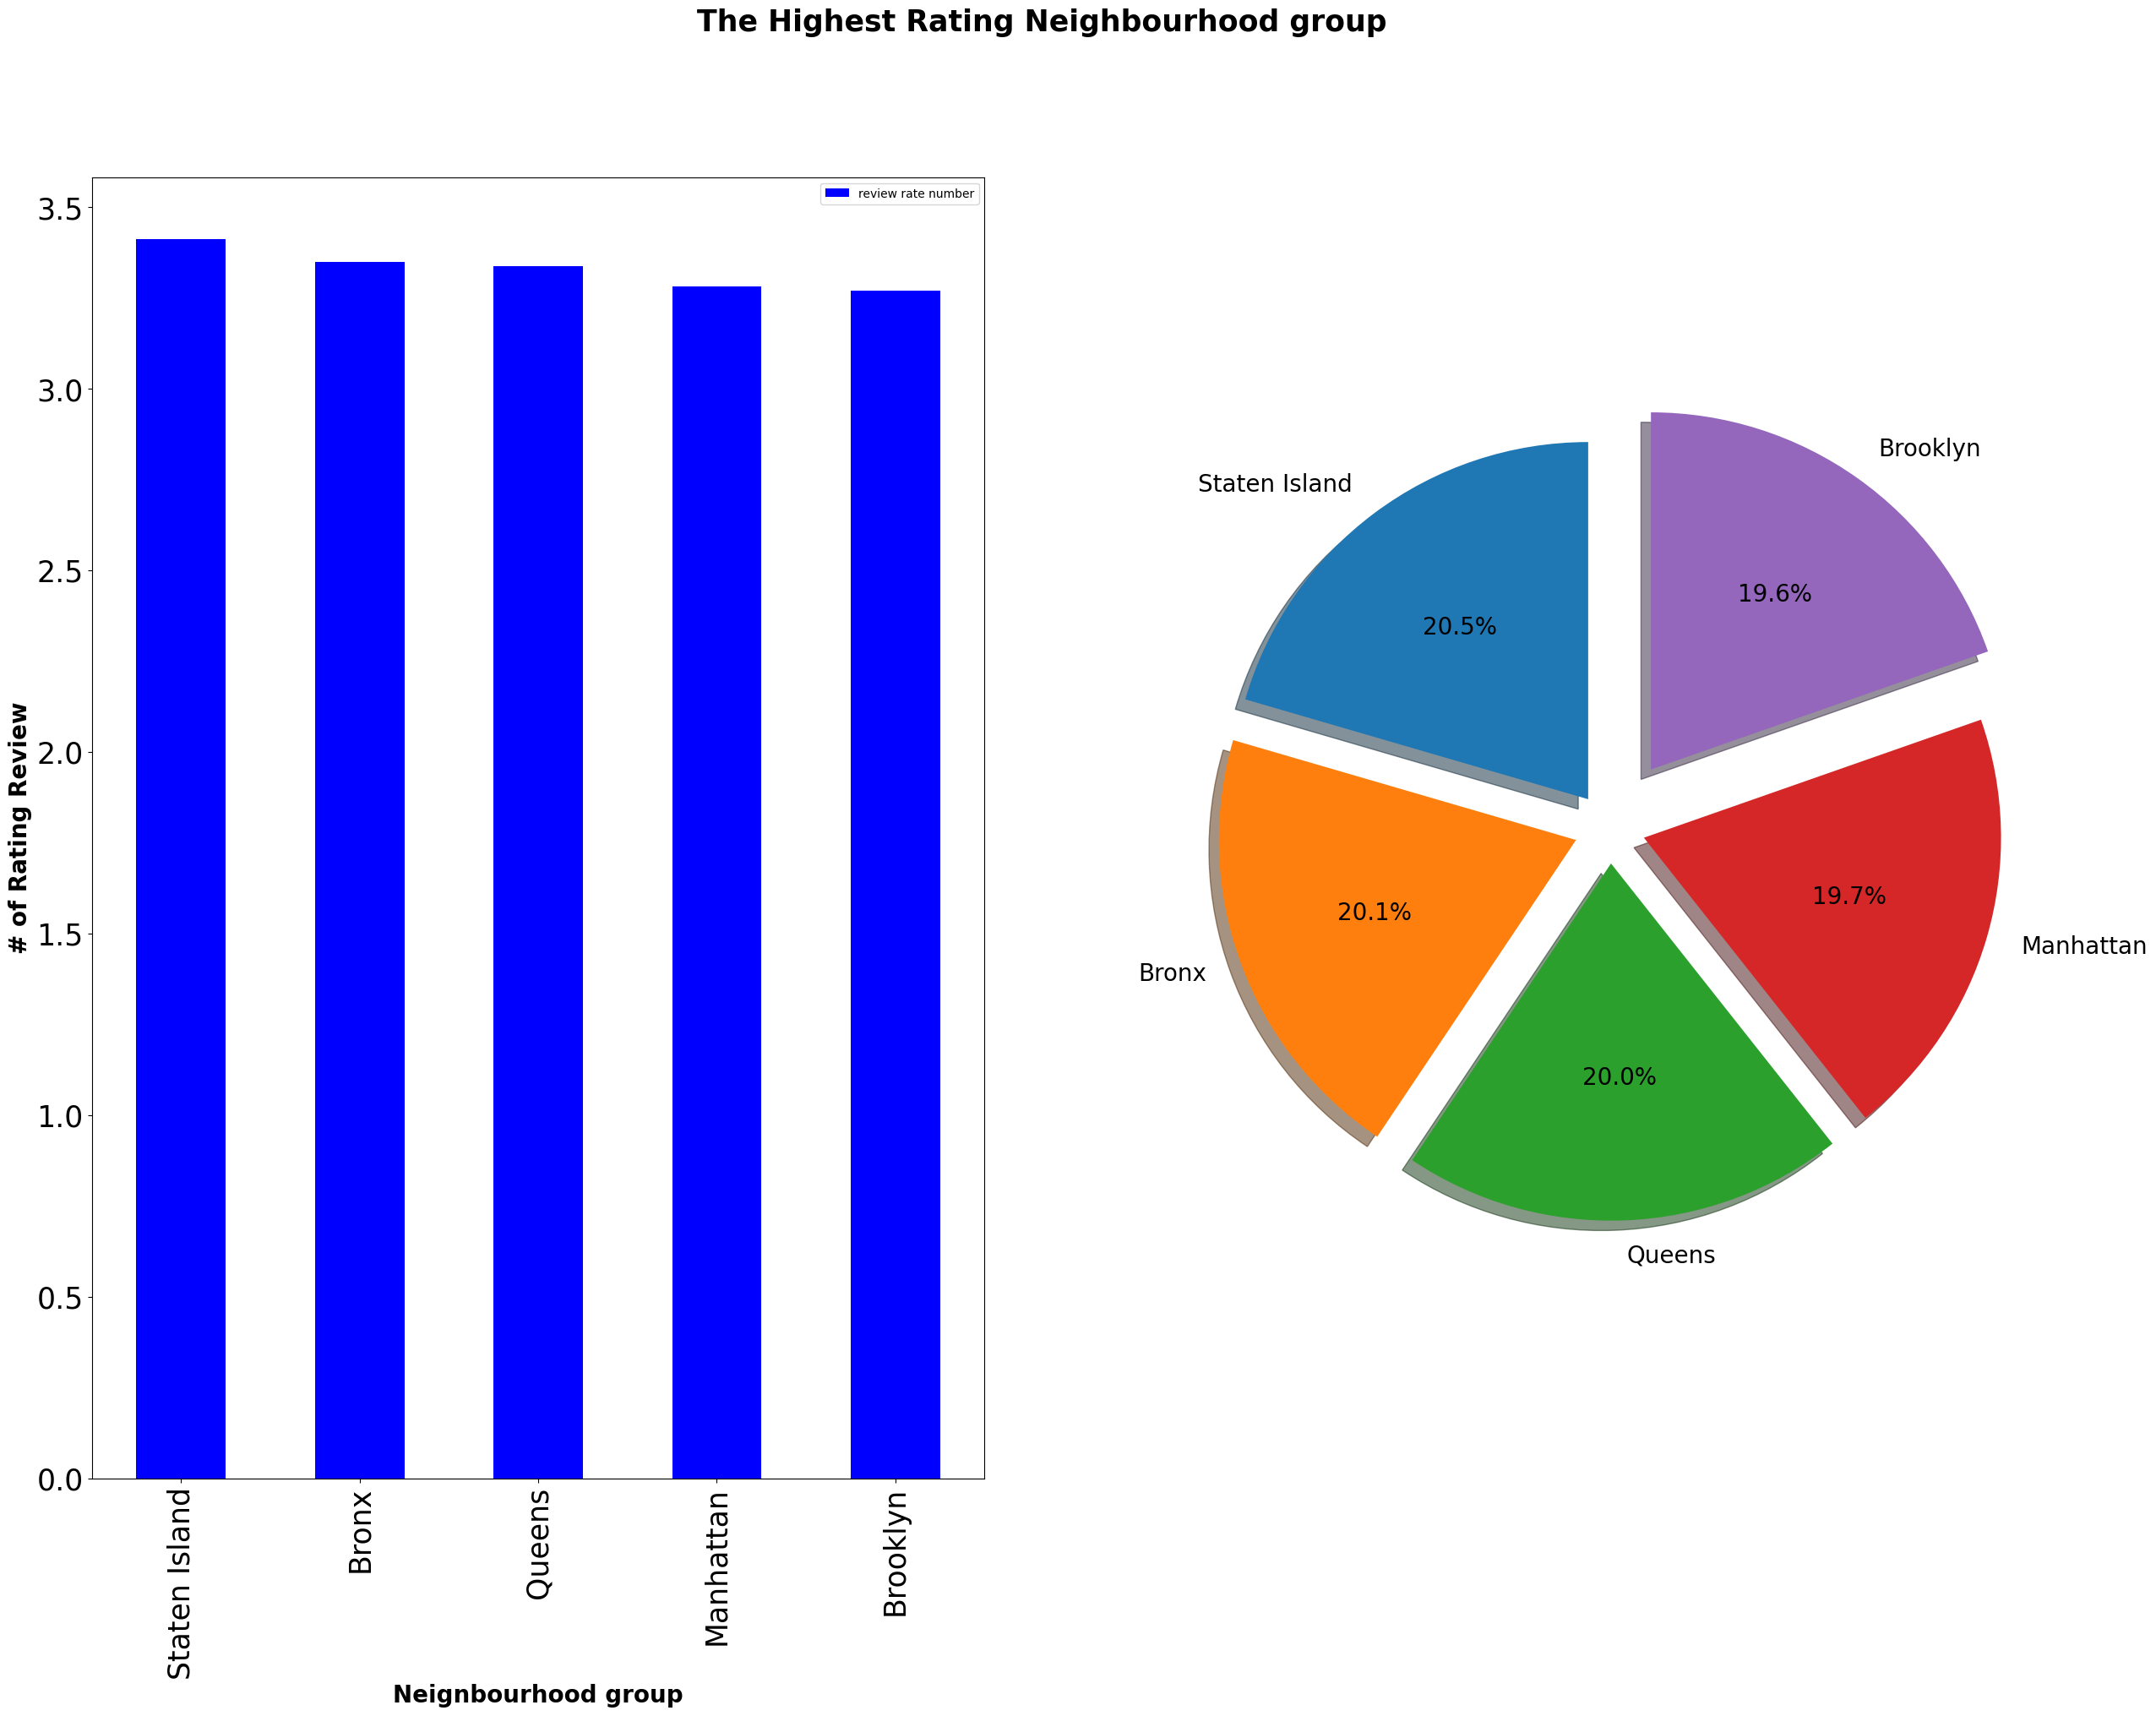

In [6]:
temp=df[['neighbourhood group','review rate number']].groupby('neighbourhood group',as_index=False).mean()
temp= temp.sort_values(['review rate number'],ascending=False)

explode=(0.1,0.1,0.1,0.1,0.2)
fig, (ax1,ax2)= plt.subplots(1,2)
fig.suptitle('The Highest Rating Neighbourhood group', fontweight='bold',fontsize=25)
temp.head(5).plot.bar(x='neighbourhood group',color='blue',figsize=(25,20),fontsize=25,ax=ax1)
ax1.set_ylabel('# of Rating Review',fontweight='bold',fontsize=20)
ax1.set_xlabel('Neignbourhood group',fontweight='bold',fontsize=20)
temp.head(10).plot(kind='pie',x='neighbourhood group',y='review rate number',figsize=(30,20),startangle=90,shadow= True,labels=temp['neighbourhood group'],legend=False,fontsize=20,explode=explode,autopct="%1.1f%%",ax=ax2)
ax2.set_ylabel('')
ax2.set_xlabel('')
fig.subplots_adjust(hspace=0.0)


# Most common Rooms Types(Shaina)
            

In [7]:
df=pd.DataFrame(airbnb_df,columns=['room type'])
df


,room type
0,Private room
1,Entire home/apt
2,Entire home/apt
3,Entire home/apt
4,Private room
...,...
82101,Private room
82102,Private room
82103,Entire home/apt
82104,Entire home/apt


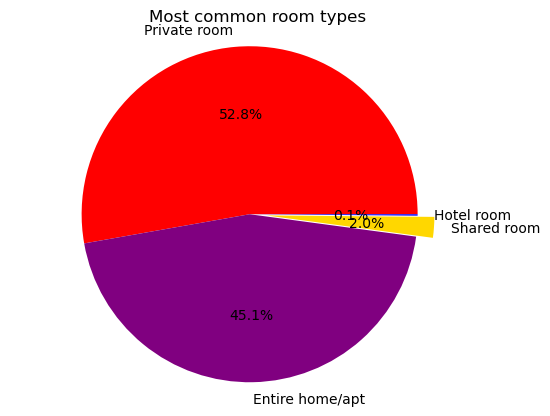

In [8]:
plt.title('Most common room types')
room=airbnb_df['room type']
colors=["red","purple","gold","blue"]
explode=(0,0,0.1,0)
plt.pie(room.value_counts(),explode=explode,labels=room.unique(),colors=colors,autopct="%1.1f%%")
plt.axis("equal")
plt.show()



# Highest Average Reviews neighbourhood group

In [9]:
df=pd.DataFrame(airbnb_df,columns=['neighbourhood group','number of reviews'])
df

,neighbourhood group,number of reviews
0,Brooklyn,9.0
1,Manhattan,45.0
2,Brooklyn,270.0
3,Manhattan,9.0
4,Brooklyn,49.0
...,...,...
82101,Queens,76.0
82102,Manhattan,4.0
82103,Manhattan,21.0
82104,Brooklyn,4.0


In [10]:
results=df['number of reviews'].groupby(df['neighbourhood group'])
results

In [11]:
len(list(df['number of reviews'].groupby(df['neighbourhood group'])))

5

In [12]:
list(df['number of reviews'].groupby(df['neighbourhood group']))


[('Bronx',
  76         4.0
  120      197.0
  176      258.0
  197      235.0
  222      108.0
           ...  
  81838    127.0
  81919    116.0
  81978     10.0
  82000     62.0
  82034    115.0
  Name: number of reviews, Length: 2267, dtype: float64),
 ('Brooklyn',
  0          9.0
  2        270.0
  4         49.0
  9        167.0
  12       231.0
           ...  
  82093     36.0
  82094     58.0
  82097     16.0
  82098     17.0
  82104      4.0
  Name: number of reviews, Length: 34049, dtype: float64),
 ('Manhattan',
  1         45.0
  3          9.0
  5        430.0
  6        160.0
  7         53.0
           ...  
  82089     22.0
  82099     49.0
  82102      4.0
  82103     21.0
  82105     22.0
  Name: number of reviews, Length: 33917, dtype: float64),
 ('Queens',
  41        10.0
  54         1.0
  83       198.0
  95        13.0
  122      414.0
           ...  
  82092      9.0
  82095     40.0
  82096     17.0
  82100    239.0
  82101     76.0
  Name: number of review

In [13]:
df.groupby(["neighbourhood group"]).agg(
    {"number of reviews":["sum","max","mean",lambda x:x.max()-x.min()]})

number of reviews                              
                                  sum     max       mean <lambda_0>
neighbourhood group                                                
Bronx                         80343.0   450.0  35.440229      449.0
Brooklyn                    1109587.0   679.0  32.604225      678.0
Manhattan                    970236.0  1024.0  28.635736     1023.0
Queens                       425378.0   698.0  38.481817      697.0
Staten Island                 31439.0   387.0  38.575460      386.0

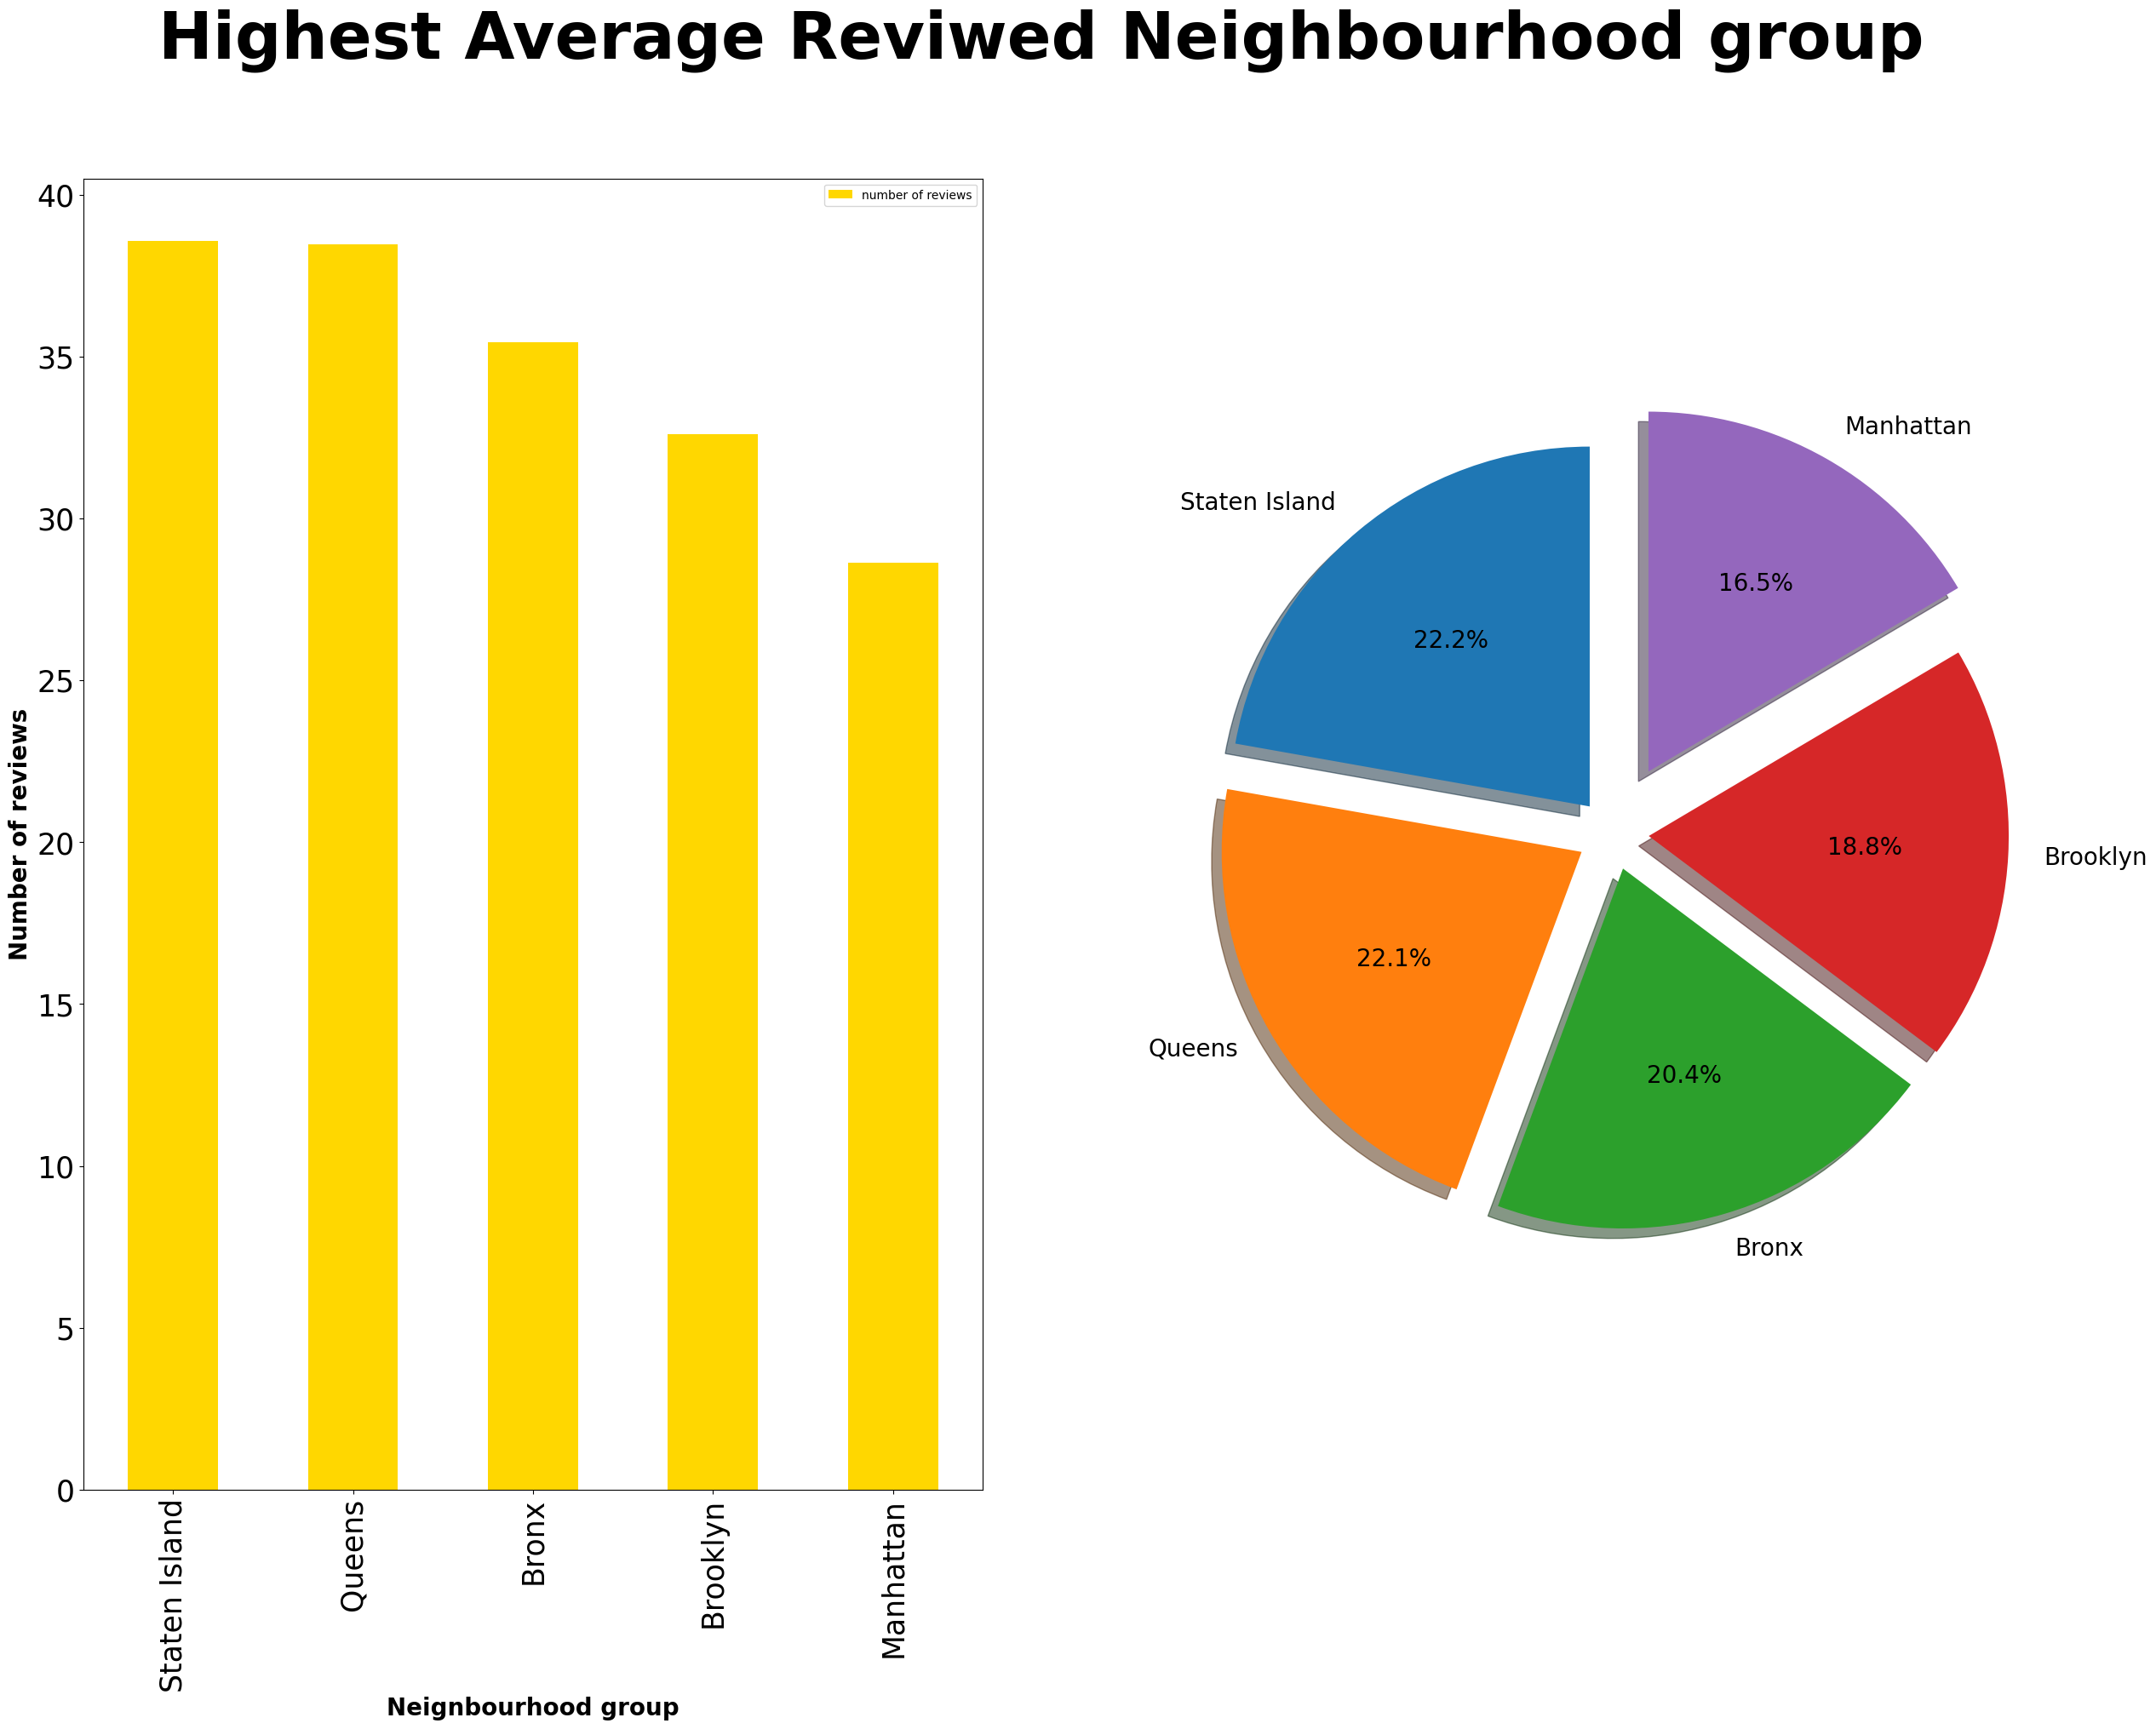

In [14]:
temp=df[['neighbourhood group','number of reviews']].groupby('neighbourhood group',as_index=False).mean()
temp= temp.sort_values(['number of reviews'],ascending=False)

explode=(0.1,0.1,0.1,0.1,0.2)
fig, (ax1,ax2)= plt.subplots(1,2)
fig.suptitle('Highest Average Reviwed Neighbourhood group', fontweight='bold',fontsize=55)
temp.head(5).plot.bar(x='neighbourhood group',color='gold',figsize=(25,20),fontsize=25,ax=ax1)
ax1.set_ylabel('Number of reviews',fontweight='bold',fontsize=20)
ax1.set_xlabel('Neignbourhood group',fontweight='bold',fontsize=20)
temp.head(10).plot(kind='pie',x='neighbourhood group',y='number of reviews',figsize=(30,20),startangle=90,shadow= True,labels=temp['neighbourhood group'],legend=False,fontsize=20,explode=explode,autopct="%1.1f%%",ax=ax2)
ax2.set_ylabel('')
ax2.set_xlabel('')
fig.subplots_adjust(hspace=0.0)


In [15]:
df=pd.DataFrame(airbnb_df,columns=['neighbourhood group','price'])
df

,neighbourhood group,price
0,Brooklyn,966
1,Manhattan,142
2,Brooklyn,368
3,Manhattan,204
4,Brooklyn,1060
...,...,...
82101,Queens,946
82102,Manhattan,706
82103,Manhattan,1043
82104,Brooklyn,809


In [17]:
df=pd.DataFrame(airbnb_df,columns=['neighbourhood group','price'])
df

,neighbourhood group,price
0,Brooklyn,966
1,Manhattan,142
2,Brooklyn,368
3,Manhattan,204
4,Brooklyn,1060
...,...,...
82101,Queens,946
82102,Manhattan,706
82103,Manhattan,1043
82104,Brooklyn,809


# Preferred Booking of Neighbourhood group

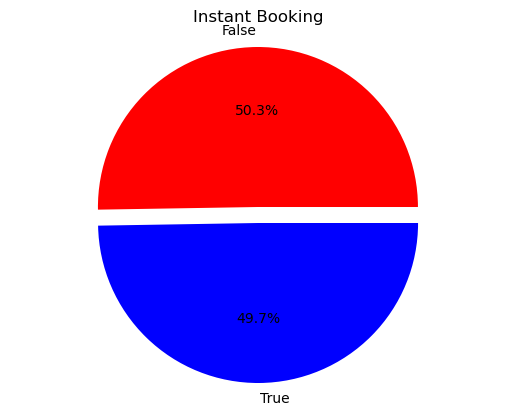

In [16]:
plt.title('Instant Booking')
book=airbnb_df['instant_bookable']
colors=["red",'blue']
explode=(0.1,0)
plt.pie(book.value_counts(),explode=explode,labels=book.unique(),colors=colors,autopct="%1.1f%%")
plt.axis("equal")
plt.show()


In [ ]:
THis is to conclude that Staten Island has the highest Average of Reviews and Ratings

In [ ]:
For Preferred booking Neighbourhood group preferred Reservation than Instant booking